# Overfitting vs Underfitting

## 1. Setup and Baseline Model

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# ignore warings in the output
import warnings
warnings.filterwarnings("ignore")

# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

model = create_model()

# saving the baseline model
history_baseline = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 2.9340 - accuracy: 0.8537 - val_loss: 0.5170 - val_accuracy: 0.8833
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4399 - accuracy: 0.8990 - val_loss: 0.4072 - val_accuracy: 0.9083
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3238 - accuracy: 0.9202 - val_loss: 0.3191 - val_accuracy: 0.9252
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2832 - accuracy: 0.9297 - val_loss: 0.3084 - val_accuracy: 0.9327
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2419 - accuracy: 0.9366 - val_loss: 0.3067 - val_accuracy: 0.9320
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2403 - accuracy: 0.9387 - val_loss: 0.2723 - val_accuracy: 0.9356
Epoch 7/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2174 - accuracy: 0.9434 - val_loss: 0.2875 - val_ac

## 2. Normalization

Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2867 - accuracy: 0.9193 - val_loss: 0.1598 - val_accuracy: 0.9546
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1275 - accuracy: 0.9626 - val_loss: 0.1183 - val_accuracy: 0.9640
Epoch 3/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0871 - accuracy: 0.9743 - val_loss: 0.1077 - val_accuracy: 0.9681
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0638 - accuracy: 0.9811 - val_loss: 0.0916 - val_accuracy: 0.9707
Epoch 5/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0846 - val_accuracy: 0.9742
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0912 - val_accuracy: 0.9735
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0299 - accuracy: 0.9913 - val_loss: 0.0845 - val

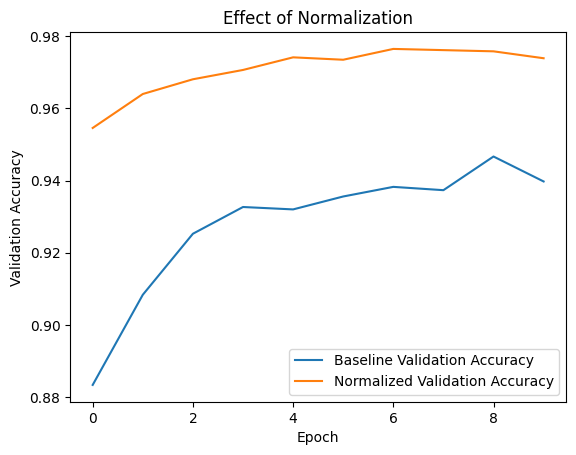

In [11]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizing the data
X_train, X_test = X_train / 255.0, X_test / 255.0

def create_model_with_norm_data():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

model_with_norm_data = create_model_with_norm_data()

# saving the baseline model
history_norm_data = model_with_norm_data.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.title('Effect of Normalization')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## 3. Dropout Layer 

Epoch 1/10
1500/1500 [==============================] - 17s 10ms/step - loss: 0.4292 - accuracy: 0.8718 - val_loss: 0.1828 - val_accuracy: 0.9465
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2382 - accuracy: 0.9303 - val_loss: 0.1352 - val_accuracy: 0.9609
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1956 - accuracy: 0.9408 - val_loss: 0.1259 - val_accuracy: 0.9623
Epoch 4/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1763 - accuracy: 0.9467 - val_loss: 0.1111 - val_accuracy: 0.9690
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1592 - accuracy: 0.9515 - val_loss: 0.1018 - val_accuracy: 0.9704
Epoch 6/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1467 - accuracy: 0.9556 - val_loss: 0.0992 - val_accuracy: 0.9710
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1379 - accuracy: 0.9581 - val_loss: 0.0949 - val_

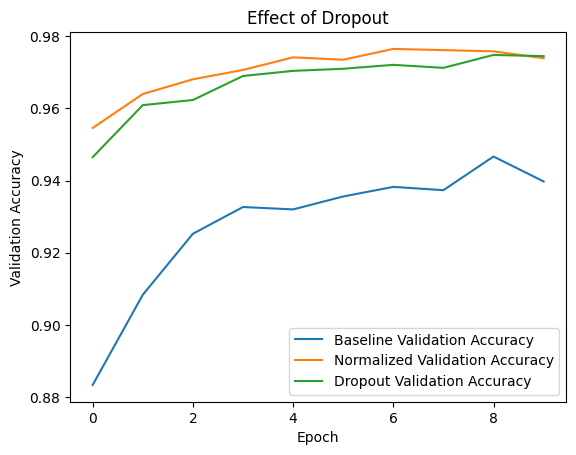

In [12]:

def create_model_with_dropout():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),  # Adding Dropout layer
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

model_with_dropout = create_model_with_dropout()

# saving the baseline model
history_dropout= model_with_dropout.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Validation Accuracy')
plt.title('Effect of Dropout')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## 4. Early Stopping

Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2885 - accuracy: 0.9172 - val_loss: 0.1601 - val_accuracy: 0.9554
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1311 - accuracy: 0.9625 - val_loss: 0.1174 - val_accuracy: 0.9653
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0892 - accuracy: 0.9745 - val_loss: 0.1095 - val_accuracy: 0.9671
Epoch 4/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0658 - accuracy: 0.9801 - val_loss: 0.0904 - val_accuracy: 0.9735
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.0875 - val_accuracy: 0.9743
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0378 - accuracy: 0.9890 - val_loss: 0.0841 - val_accuracy: 0.9757
Epoch 7/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0310 - accuracy: 0.9909 - val_loss: 0.0883 - val_ac

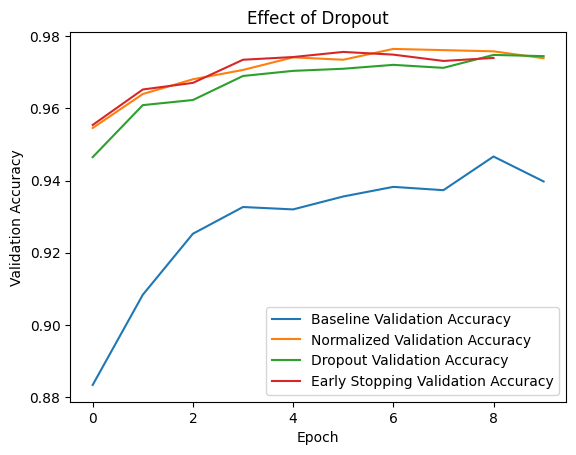

In [13]:
# Early Stopping
earlyStopping  = EarlyStopping(monitor='val_loss', patience=3)

model_es = create_model_with_norm_data()

# saving the baseline model
history_es= model_es.fit(X_train, y_train, epochs=10, validation_split=0.2,callbacks=[earlyStopping],verbose=1)

plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Validation Accuracy')
plt.plot(history_es.history['val_accuracy'], label='Early Stopping Validation Accuracy')
plt.title('Effect of Dropout')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## 5. LI/L2 Regularization
L1 and L2 regularization are two common regularization techniques that can be used to reduce overfitting.

L1 in Keras: `kernel_regularizer=regularizers.l1(0.001)` L2 in Keras: `kernel_regularizer=regularizers.12(0.001)`

L1 changes the loss function by adding the sum of the absolute weights to it. L2 changes the loss function by adding the sum of the
squared weights to it.
- L1 make zero some of the weights.
- L2 make the weights small.

Epoch 1/10
1500/1500 [==============================] - 18s 10ms/step - loss: 0.6545 - accuracy: 0.8661 - val_loss: 0.3956 - val_accuracy: 0.9383
Epoch 2/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.4468 - accuracy: 0.9191 - val_loss: 0.3261 - val_accuracy: 0.9545
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4004 - accuracy: 0.9321 - val_loss: 0.2982 - val_accuracy: 0.9607
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3757 - accuracy: 0.9381 - val_loss: 0.2880 - val_accuracy: 0.9641
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3626 - accuracy: 0.9402 - val_loss: 0.2801 - val_accuracy: 0.9651
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3554 - accuracy: 0.9427 - val_loss: 0.2755 - val_accuracy: 0.9662
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3479 - accuracy: 0.9437 - val_loss: 0.2695 - 

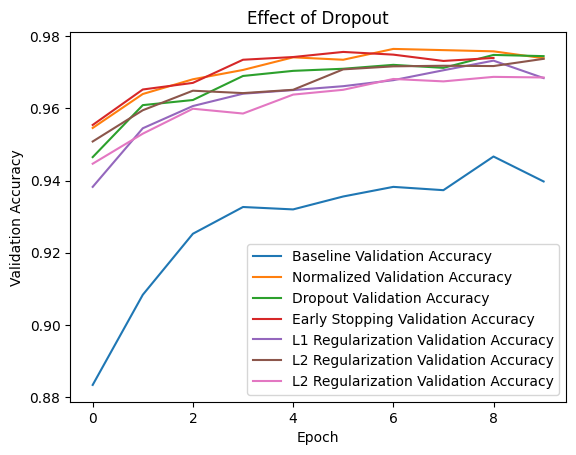

In [18]:
from tensorflow.keras.layers import Dropout,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1,l2,l1_l2
import matplotlib.pyplot as plt
# for L1 regularization
def create_model_with_l1_regularization():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu",kernel_regularizer=l1(0.0001)), # L1 regularization
        Dropout(0.5),  # Adding Dropout layer which will also be regularized by L1
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# for L2 regularization
def create_model_with_l2_regularization():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu",kernel_regularizer=l2(0.0001)), # L2 regularization
        Dropout(0.5),  # Adding Dropout layer which will also be regularized by L2
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# for L1_L2 regularization
def create_model_with_l1_l2_regularization():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu",kernel_regularizer=l1_l2(l1=0.0001,l2=0.0001)), # l1_l2 regularization
        Dropout(0.5),  # Adding Dropout layer which will also be regularized by l1_l2
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

model_with_l1 = create_model_with_l1_regularization()
model_with_l2 = create_model_with_l2_regularization()
model_with_l1_l2 = create_model_with_l1_l2_regularization()

# saving the baseline model
history_l1 = model_with_l1.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
history_l2 = model_with_l2.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)
history_l1_l2 = model_with_l1_l2.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)



plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout Validation Accuracy')
plt.plot(history_es.history['val_accuracy'], label='Early Stopping Validation Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='L1 Regularization Validation Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization Validation Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='L2 Regularization Validation Accuracy')
plt.title('Effect of Dropout')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

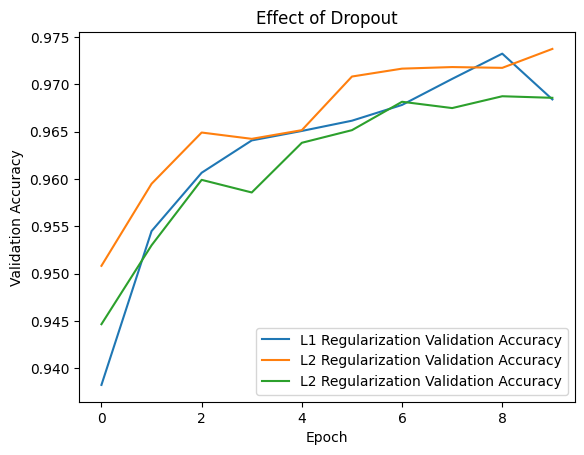

In [20]:
plt.plot(history_l1.history['val_accuracy'], label='L1 Regularization Validation Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularization Validation Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='L2 Regularization Validation Accuracy')
plt.title('Effect of Dropout')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## 6. K-fold cross validation

**`k-fold cross-validation in TensorFlow`** requires a bit more manual setup compared to libraries like scikit-learn, which offer built-in k-fold cross-validation functions. TensorFlow does not have a direct function for k-fold cross-validation, but you can achieve this by manually splitting your dataset into k folds and then training and evaluating your model on each fold.

Below is an example code that demonstrates how to perform k-fold cross-validation with the MNIST dataset in TensorFlow. This example uses a simple neural network similar to the ones discussed previously.

Epoch 1/10
1500/1500 [==============================] - 16s 9ms/step - loss: 0.2748 - accuracy: 0.9218 - val_loss: 0.1517 - val_accuracy: 0.9540
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1185 - accuracy: 0.9654 - val_loss: 0.1189 - val_accuracy: 0.9638
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0803 - accuracy: 0.9760 - val_loss: 0.1000 - val_accuracy: 0.9702
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0597 - accuracy: 0.9824 - val_loss: 0.1087 - val_accuracy: 0.9674
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0463 - accuracy: 0.9861 - val_loss: 0.0971 - val_accuracy: 0.9707
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0349 - accuracy: 0.9894 - val_loss: 0.0893 - val_accuracy: 0.9734
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.1001 - val

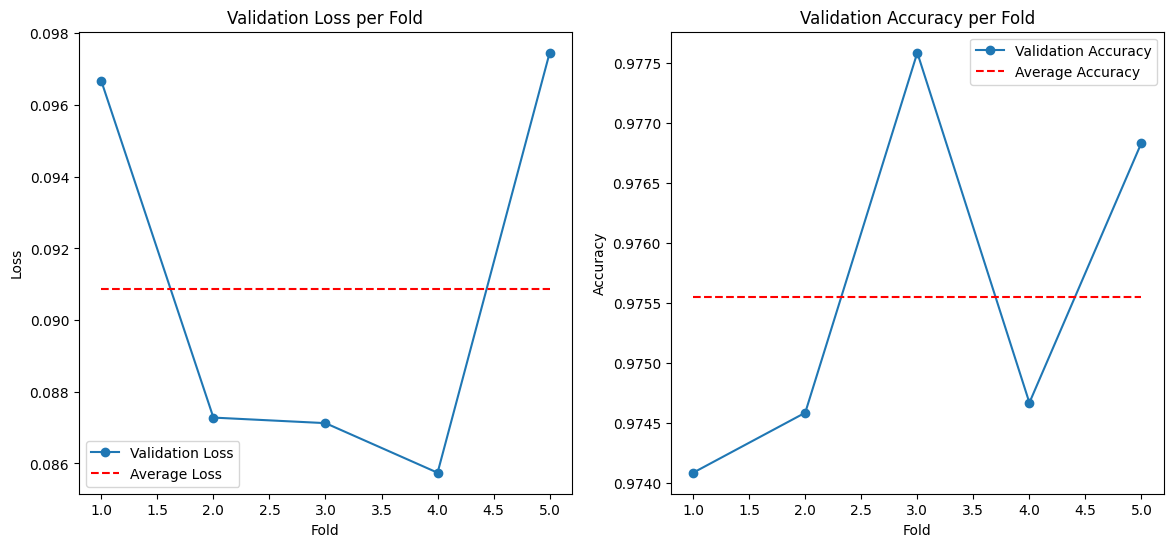

CPU times: total: 19min 23s
Wall time: 40min 25s


In [19]:
%%time
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data
y_train = to_categorical(y_train, 10)  # One-hot encode labels

# Define a simple model architecture function
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Prepare for k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

# Arrays to store scores
fold_idx = 1
scores = []

for train_index, val_index in kf.split(x_train):
    # Split data
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # create a model
    model_kfold_cv = create_model()
    
    # Train model
    history_kfold_cv = model_kfold_cv.fit(x_train_fold, y_train_fold, epochs=10, validation_data=(x_val_fold, y_val_fold), verbose=1)
    
    # Append the last score from the history
    scores.append((history_kfold_cv.history['val_loss'][-1], history_kfold_cv.history['val_accuracy'][-1]))

# Calculate and print average performance across all folds
average_loss, average_accuracy = np.mean(scores, axis=0)
print(f'\nK-Fold Validation Results:\nAverage Loss: {average_loss}, Average Accuracy: {average_accuracy}')

# Plotting
folds = range(1, k + 1)
val_losses, val_accuracies = zip(*scores)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(folds, val_losses, 'o-', label='Validation Loss')
plt.plot(folds, [average_loss] * k, 'r--', label='Average Loss')
plt.title('Validation Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(folds, val_accuracies, 'o-', label='Validation Accuracy')
plt.plot(folds, [average_accuracy] * k, 'r--', label='Average Accuracy')
plt.title('Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

This code performs the following steps:
1. Normalizes the data and one-hot encodes the labels.
2. Defines a simple neural network model inside a function so that a fresh model can be created for each fold.
3. Uses `KFold` from `sklearn.model_selection` to generate train/validation splits.
4. Trains a new model instance on each train fold and evaluates it on the corresponding validation fold.
5. Calculates and prints the average loss and accuracy across all folds at the end.

Remember, k-fold cross-validation can be computationally expensive since it involves training and evaluating k separate models. Adjust the number of epochs, model complexity, or the dataset size as necessary to manage the computational load.